In [1]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
model = load_model('trained_model.h5')

#let's hide the warnings of feature depreciation and other 
import warnings
warnings.filterwarnings('ignore')

2022-03-07 19:29:29.256029: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 19:29:29.256047: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-07 19:29:31.158091: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ds/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-03-07 19:29:31.158112: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-07 19:29:31.158129: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ds): /proc/driver/nvidia/version does no

Text(0.5, 1.0, 'Predicted mask')

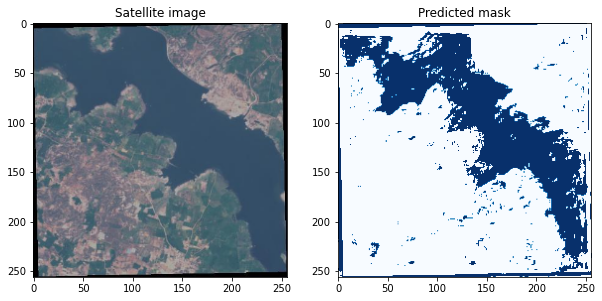

In [76]:
water_test = cv2.imread('dataset/test/41.jpg')
water_test_to_RGB = cv2.cvtColor(water_test,cv2.COLOR_BGR2RGB)
water_test_resized = cv2.resize(water_test_to_RGB,(256,256))

water_test_for_prediction = np.expand_dims(water_test_resized, axis=0)
y_pred = model.predict(water_test_for_prediction)

predicted_mask = np.squeeze(y_pred)
predicted_mask_binary = (predicted_mask > 0.6).astype(np.uint8)

figure,ax = plt.subplots(1,2,figsize=(10,10))    
ax[0].imshow(water_test_resized)
ax[1].imshow(predicted_mask_binary, cmap='Blues')
ax[0].set_title("Satellite image")
ax[1].set_title("Predicted mask")